# MUSHROOM - CLASSIFICATION

#### AIM : To predict which category the mushroom falls - Edible or Poisonous

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data from web
file='https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv'

In [3]:
#Reading it into a data frame
ds=pd.read_csv(file)

In [4]:
#To view the top 5 rows 
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


We can see the top 5 rows of the data

In [6]:
#Let us see the data of last 5 rows
ds.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


We can see the last 5 rows of the data

In [7]:
#Let us see the no. of rows & columns present in the data
ds.shape

(8124, 23)

There are: 8124 - Rows and 23- Columns in the given dataset

In [8]:
#Checking for null values
ds.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values in the given dataset.

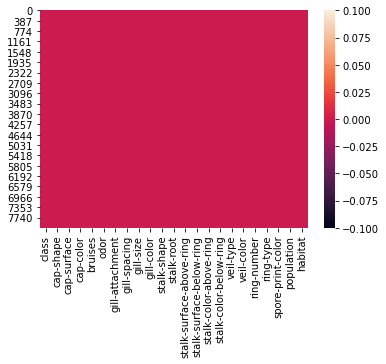

In [9]:
#Let's see it visually
sns.heatmap(ds.isna())

We can clearly see that there are no missing values

In [10]:
#Checking data types
ds.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

all are in object type

In [11]:
#Checking what are different classes present
print(ds['class'].unique())

['p' 'e']


There are only two classes : e & p

In [12]:
#Count of the unique values in class
ds['class'].nunique()

2

This shows there are only two types in class column 

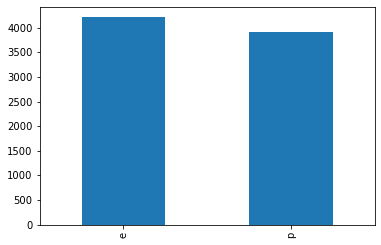

In [13]:
ds['class'].value_counts().plot(kind='bar')

We can see that e are more and p are some what less in the dataset

In [14]:

ds['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

The exact count of different variety in column class, they are imbalenced. we need to balance them
This is Binomial data

In [ ]:
#Let us check for other columns simillarly

In [15]:
col=ds.columns
col

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [18]:
len(ds.columns)

23

In [94]:
for i in col:
    print(f'no. of. unique elements in {i}: ',ds[i].nunique())
    print(f'count of. each unique elements in {i}:\n',ds[i].value_counts())
    print('\n')
    
    

no. of. unique elements in class:  2
count of. each unique elements in class:
 e    4208
p    3916
Name: class, dtype: int64


no. of. unique elements in cap-shape:  6
count of. each unique elements in cap-shape:
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


no. of. unique elements in cap-surface:  4
count of. each unique elements in cap-surface:
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


no. of. unique elements in cap-color:  10
count of. each unique elements in cap-color:
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64


no. of. unique elements in bruises:  2
count of. each unique elements in bruises:
 f    4748
t    3376
Name: bruises, dtype: int64


no. of. unique elements in odor:  9
count of. each unique elements in odor:
 n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odo

From above we can see all the data of no. of unique elements and their count in each column

All other columns determines contributes in determining our target

In [95]:
#General summary about the data
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [96]:
#Statistical summary
ds.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


From above we can see, no.of unique elements in each column, the frequancy of top element in that column

We cant send object type data for machine to predict, so we change them into numerical using encoding technique

### Encoding : Label Encoder
    

In [97]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [98]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        from sklearn.preprocessing import LabelEncoder
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

Class function to encode all the columns in dataset using label encoder : sourced code from stackoverflow 

In [99]:
ds_en=MultiColumnLabelEncoder(columns=col).fit_transform(ds)
ds_en

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


Since all the columns in dataset are categorical data, we will not have any outliers or skewness to check and reduce. Also no need of standardiztion or normalisation

we will check for the correlation , multicolinearity and remove those particular columns and then balance the dataset before  sending to the model

In [63]:
#Splitting the target variable dataset
y=ds_en.iloc[:,0]

In [72]:
y.shape

(8416,)

There are 8416 rows and 1 column in target column - class

In [68]:
#Splitting the predictor variables from dataset
x=ds_en.iloc[:,1:]

In [73]:
x.shape

(8416, 22)

There are 8416 rows and 22 columns 

In [89]:
ds_en.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


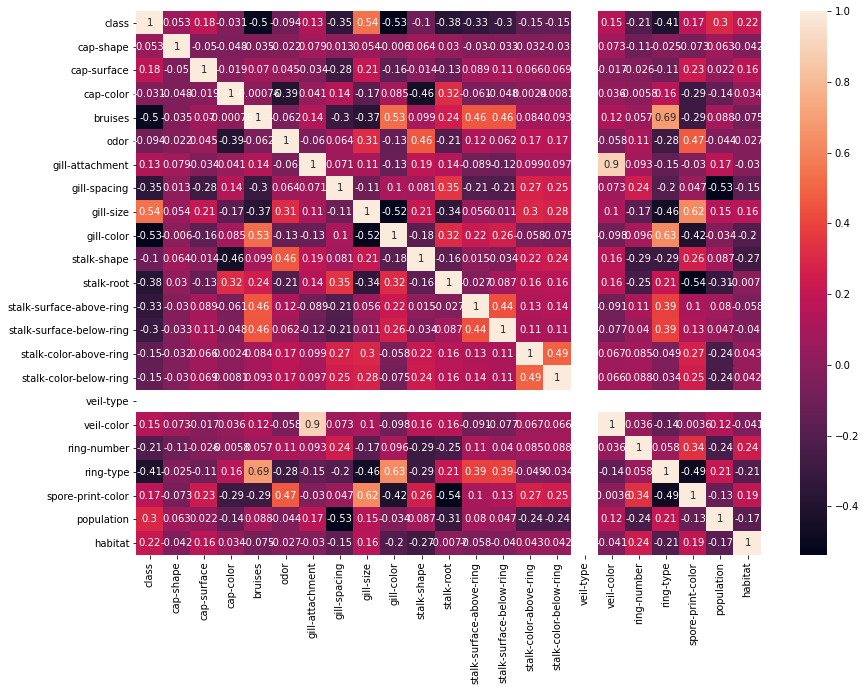

In [102]:
plt.figure(figsize=(14,10))
sns.heatmap(ds_en.corr(),annot=True)

Observations:
    Class is highly correlated with : gill-size & -vely correlated with gill-colour,bruises, ringtype
    gill-size is highly correlated with : Spore print color and -vely correlated with:gill-color
    gill-color is highly correlated with :ring type
    Bruises is highly correlated with :ring-type, gill-color, stalk-surface above ring & below ring
    odor is correlated with stalk-shape
    
    Stalk color - above ring & below ring are having same correlation with class, so we can drop one of those columns
    Bruises and gill colour are also highly correlated negatively with class , so we can drop one of them
    There is only one veil-type, so no need of that
    
    I am dropping viel-type,Bruises and stalk color below the ring from our dataset
     
        

In [106]:
#dropping few columns
ds_new=ds_en.drop(['bruises','stalk-color-below-ring','veil-type'],axis=1)
ds_new.shape

(8124, 20)

In [109]:
x_new=ds_new.iloc[:,1:]

In [110]:
y_new=ds_new.iloc[:,0]

Now we have only 20 columns.

In [108]:
#Let us split the data into train & test 
from sklearn.model_selection import train_test_split

In [111]:
#Splitting data - 75% for training and 25% for testing
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=45)

In [112]:
x_train.shape

(6093, 19)

we have 6093 rows and 19 columns in training

In [113]:
y_train.shape

(6093,)

we have 6093 rows and 1 column in training of target

In [115]:
x_test.shape

(2031, 19)

we are sending 2031 rows and 19 columns to test

In [116]:
y_test.shape

(2031,)

we have 2031 rows in the target column

We can now send the data to model to learn ans predict, for this we can use models :
    1)Logistic Regression
    2)Decision tree
    3)KNN
    4)SVC
    5)Gausian Naive Bayes

In [121]:
#Importing all necessary libraries for models and metrics for all models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [132]:
#Making instances of each  model
lr=LogisticRegression()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
gnb=GaussianNB()

In [133]:
#Sending all the models into a list
models=[lr,svc,dtc,knc,gnb]

In [134]:
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'Metrics report for model {m}:')
    print('score:',accuracy_score(y_test,predm))
    print('confusion matrix:\n',confusion_matrix(y_test,predm))
    print('classification report:\n',classification_report(y_test,predm))
    print('\n')

Metrics report for model LogisticRegression():
score: 0.948301329394387
confusion matrix:
 [[1010   47]
 [  58  916]]
classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1057
           1       0.95      0.94      0.95       974

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



Metrics report for model SVC():
score: 0.9926144756277696
confusion matrix:
 [[1055    2]
 [  13  961]]
classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1057
           1       1.00      0.99      0.99       974

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



Metrics report for model DecisionTreeClassifier():
score: 1.0
confusion 

In [140]:
#Checking the scores with cross validation
from sklearn.model_selection import cross_val_score
for m in models:
    cvscore=cross_val_score(m,x_train,y_train,cv=5)
    print(f'CV Scores of {m}:')
    print(f'Mean score:',round(cvscore.mean(),2))
    print(f'Std:',cvscore.std())
    print('\n')


CV Scores of LogisticRegression():
Mean score: 0.95
Std: 0.00506408740003894


CV Scores of SVC():
Mean score: 0.99
Std: 0.0014272634098757176


CV Scores of DecisionTreeClassifier():
Mean score: 1.0
Std: 0.0


CV Scores of KNeighborsClassifier():
Mean score: 1.0
Std: 0.0034957729872173815


CV Scores of GaussianNB():
Mean score: 0.81
Std: 0.023255029118979455




Cross Validation Scores from above:    
    Logistic Regression      : 0.95
    Support Vector Classifier: 0.99
    Decision Tree Classifier : 1.0
    K Neighbors Classifier   : 1.0
    Gaussian Naive Bayes     : 0.81
    

In [146]:
#Hyperparameter tuning for Decision Tree Classifier using Grid Search CV
from sklearn.model_selection import GridSearchCV
diff_para={'criterion':['gini', 'entropy'],'splitter':['best','random'],'random_state':[10,20,30,40,50,60,70]}
grid=GridSearchCV(estimator=dtc,param_grid=diff_para)
grid.fit(x_train,y_train)
print('Best Score:',grid.best_score_)
print('Best Estimator:',grid.best_estimator_)
print('Best Parameter:',grid.best_params_)

Best Score: 1.0
Best Estimator: DecisionTreeClassifier(random_state=10)
Best Parameter: {'criterion': 'gini', 'random_state': 10, 'splitter': 'best'}


In [151]:
#Final model with the best parameters
dtc_f=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=10)
dtc_f.fit(x_train,y_train)
preddtc_f=dtc_f.predict(x_test)

In [153]:
#Saving the model
import joblib
dtc_f=joblib.dump(dtc_f,'2.Mushroom.obj')

Conclusion: 
     The Decission Tree Classifier model gives the best output 100% accurate in predicting wether the given mushroom is edible or poisonous